Retrouver le tableau de donnée "reduced_covid_sexe.csv" à partir des données csv officielle disponible sur le site de data.gouv.fr (pd.groupby?, et pd.unstack?)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("covid-hospit-2023.csv", sep= ';')
df_meta = pd.read_csv("metadonnees-donnees-hospitalieres.csv", sep= ';', encoding='latin')
pd.set_option('display.max_colwidth', None)
df_meta

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,DÃ©partement,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalisées,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en services de réanimation ou soins intensifs,Number of people currently in resuscitation or critical care,0
5,rad,integer,Nombre cumulé de personnes retournées à domicile,Total amount of patient that returned home,1
6,dc,integer,Nombre cumulé de personnes décédées à l'hôpital,Total amout of deaths at the hospital,0
7,ssr_usld,integer,Nombre de personnes actuellement en services de SSR ou USLD,NaN,NaN
8,hospconv,integer,Nombre de personnes actuellement en services d'hospitalisation conventionnelle,NaN,NaN
9,autres,integer,Nombre de personnes actuellement en autres types de services,NaN,NaN


In [82]:
df_reduced = df
#si on veut virer les départements , on fait la somme avec groupby
df_reduced = df_reduced.groupby(by=['jour','sexe'])[['hosp', 'rea', 'rad', 'dc']].sum()
df_reduced

hosp   rea     rad      dc
jour       sexe                             
2020-03-18 0      2972   771     816     218
           1      1685   525     432     121
           2      1248   239     379      96
2020-03-19 0      4073  1002    1180     327
           1      2256   689     580     179
...                ...   ...     ...     ...
2023-03-30 1      5953   459  421833   77609
           2      7003   267  433447   57376
2023-03-31 0     13149   709  863837  136076
           1      5919   446  422089   77630
           2      6997   258  433693   57385

[3327 rows x 4 columns]

In [83]:
#si on veut split par sexe , unstack? 
df_reduced = df_reduced.unstack()
df_reduced

hosp               rea                rad                  \
sexe            0     1     2     0     1    2       0       1       2   
jour                                                                     
2020-03-18   2972  1685  1248   771   525  239     816     432     379   
2020-03-19   4073  2256  1632  1002   689  284    1180     580     562   
2020-03-20   5226  2912  2134  1297   905  362    1587     777     764   
2020-03-21   5900  3298  2401  1453  1018  401    1811     881     888   
2020-03-22   6954  3906  2815  1674  1176  461    2117    1031    1040   
...           ...   ...   ...   ...   ...  ...     ...     ...     ...   
2023-03-27  13113  5950  6923   728   457  263  861972  421189  432745   
2023-03-28  13178  6000  6943   720   452  261  862458  421407  433007   
2023-03-29  13184  5989  6964   734   456  270  862962  421645  433268   
2023-03-30  13186  5953  7003   732   459  267  863331  421833  433447   
2023-03-31  13149  5919  6997   709   446  258  863837  422089  433693   

                dc                
sexe             0      1      2  
jour                              
2020-03-18     218    121     96  
2020-03-19     327    179    136  
2020-03-20     450    250    190  
2020-03-21     525    297    219  
2020-03-22     632    356    263  
...            ...    ...    ...  
2023-03-27  135936  77555  57324  
2023-03-28  135975  77575  57342  
2023-03-29  136009  77594  57356  
2023-03-30  136045  77609  57376  
2023-03-31  136076  77630  57385  

[1109 rows x 12 columns]

In [86]:
df_dep = df.groupby(by=['dep'])[['hosp', 'rea', 'rad', 'dc']].sum()
df_dep

,hosp,rea,rad,dc
dep,,,,
01,268428,17151,6107365,1220559
02,338783,35867,9764030,2230232
03,172600,14219,5760710,1193913
04,153650,6862,2802998,505658
05,126579,10665,3195990,531471
...,...,...,...,...
972,188310,37308,4821845,1126920
973,102802,20752,8165933,504431
974,314208,43152,8140680,943701


(array([44., 29., 10.,  8.,  3.,  3.,  2.,  0.,  2.,  1.]),
 array([2.1600000e+02, 9.5486720e+05, 1.9095184e+06, 2.8641696e+06,
        3.8188208e+06, 4.7734720e+06, 5.7281232e+06, 6.6827744e+06,
        7.6374256e+06, 8.5920768e+06, 9.5467280e+06]),
 <BarContainer object of 10 artists>)

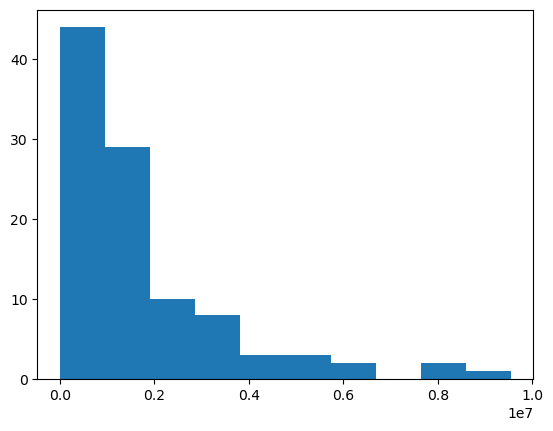

In [85]:
plt.hist(df_dep['dc'])